AICE Associate test

In [169]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import callbacks
from keras.layers import Add, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [126]:
print(dir(keras))

['DTypePolicy', 'FloatDTypePolicy', 'Function', 'Initializer', 'Input', 'InputSpec', 'KerasTensor', 'Layer', 'Loss', 'Metric', 'Model', 'Operation', 'Optimizer', 'Quantizer', 'Regularizer', 'Sequential', 'StatelessScope', 'SymbolicScope', 'Variable', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'activations', 'applications', 'backend', 'callbacks', 'config', 'constraints', 'datasets', 'device', 'distribution', 'dtype_policies', 'export', 'initializers', 'layers', 'legacy', 'losses', 'metrics', 'mixed_precision', 'models', 'name_scope', 'ops', 'optimizers', 'preprocessing', 'quantizers', 'random', 'regularizers', 'tree', 'utils', 'version']


In [127]:
print(dir(keras.layers))

['Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'AutoContrast', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Flatten', 'FlaxLayer', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'GlobalMaxPool2D', 'GlobalMaxPool3D', 

In [128]:
import xgboost
import lightgbm
print(dir(xgboost))
print(dir(lightgbm))
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

['Booster', 'DMatrix', 'DataIter', 'ExtMemQuantileDMatrix', 'QuantileDMatrix', 'RabitTracker', 'XGBClassifier', 'XGBModel', 'XGBRFClassifier', 'XGBRFRegressor', 'XGBRanker', 'XGBRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_data_utils', '_py_version', '_typing', 'build_info', 'callback', 'collective', 'compat', 'config', 'config_context', 'core', 'cv', 'data', 'get_config', 'libpath', 'plot_importance', 'plot_tree', 'plotting', 'set_config', 'sklearn', 'to_graphviz', 'tracker', 'train', 'training']
['Booster', 'CVBooster', 'DaskLGBMClassifier', 'DaskLGBMRanker', 'DaskLGBMRegressor', 'Dataset', 'EarlyStopException', 'LGBMClassifier', 'LGBMModel', 'LGBMRanker', 'LGBMRegressor', 'Path', 'Sequence', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version_path', 'basic', 'callback', '

In [129]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [130]:
# df_o = sns.load_dataset('titanic') # 분류 : 생존자(suvived) 예측
df_o = sns.load_dataset('diamonds') # 회귀 : 가격(price) 예측
df = df_o.copy()
print(df.isnull().sum())
print(df.nunique())
print(df.info())
print(df.head())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
   carat      cut color clari

In [131]:
# print(df['suvieved'].value_counts())
# print(df['price'].value_counts())

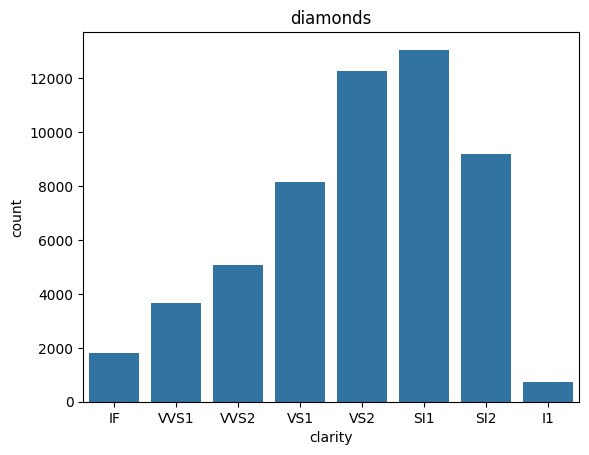

In [132]:
sns.countplot(data=df, x='clarity')
plt.title('diamonds')
plt.show()

In [133]:
print(df['clarity'].value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [134]:
df = df[df['clarity'] != 'I1']
print(df['clarity'].value_counts())

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1          0
Name: count, dtype: int64


In [135]:
df.describe() # carot 의 경우 mean 과 50% 의 차이 10%가 넘어감, 데이터가 분균형할 확률이 높다. 
# mean > medain 우측으로 긴 꼬리 Right-skewed -> 큰 값 이상치 존재 가능 (이상치 탐색 보다는 데이터 불균형 탐색)
# mean < medain 좌측으로 긴 꼬리 Left-skewed -> 작은 값 이상치 존재 가능

,carat,depth,table,price,x,y,z
count,53199.000000,53199.000000,53199.000000,53199.000000,53199.000000,53199.000000,53199.000000
mean,0.791172,61.735687,57.445392,3932.919942,5.716811,5.720947,3.529413
std,0.467887,1.398479,2.227227,4003.465162,1.116296,1.137709,0.701031
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2388.000000,5.680000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5327.500000,6.530000,6.530000,4.030000
max,3.510000,79.000000,95.000000,18823.000000,9.660000,58.900000,31.800000


<Axes: xlabel='carat', ylabel='Count'>

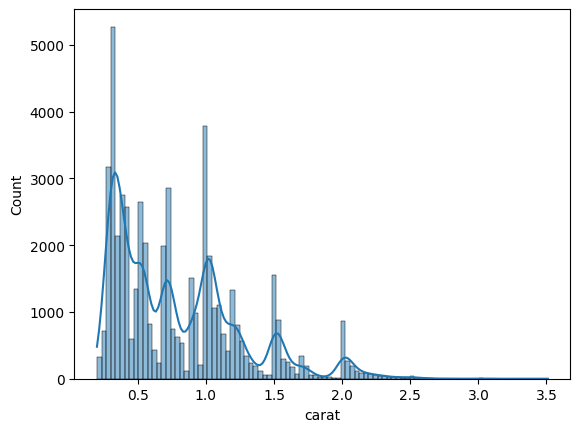

In [136]:
sns.histplot(data=df, x='carat', kde=True)

In [137]:
counts = df['carat'].value_counts()
print(counts) # 257
print((counts > 2).sum()) # 238, 값 대체 시 median 이나 mean 값으로 대체 replace()

carat
0.30    2603
0.31    2248
1.01    2209
0.70    1937
0.32    1835
        ... 
2.64       1
2.75       1
2.63       1
2.65       1
2.59       1
Name: count, Length: 257, dtype: int64
238


-0.5599999999999999
2.0
count    53199.000000
mean         0.791172
std          0.467887
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          3.510000
Name: carat, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x26387d24290>,
 'caps': [<matplotlib.lines.Line2D at 0x26387d25690>,
 'boxes': [<matplotlib.lines.Line2D at 0x26387dfb850>],
 'medians': [<matplotlib.lines.Line2D at 0x26387d26710>],
 'fliers': [<matplotlib.lines.Line2D at 0x26387d26f10>],
 'means': []}

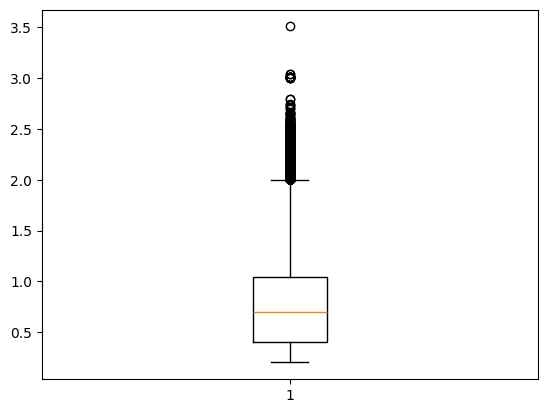

In [138]:
Q3 = df['carat'].quantile(0.75)
Q1 = df['carat'].quantile(0.25)

IQR = Q3 - Q1

min_limit = Q1 - 1.5*IQR
print(min_limit) # -0.55
max_limit = Q3 + 1.5*IQR
print(max_limit) # 2.0

df_limit = df[(df['carat'] > min_limit) | (df['carat'] < max_limit)]
print(df_limit['carat'].describe())

plt.boxplot(data=df_limit, x='carat')

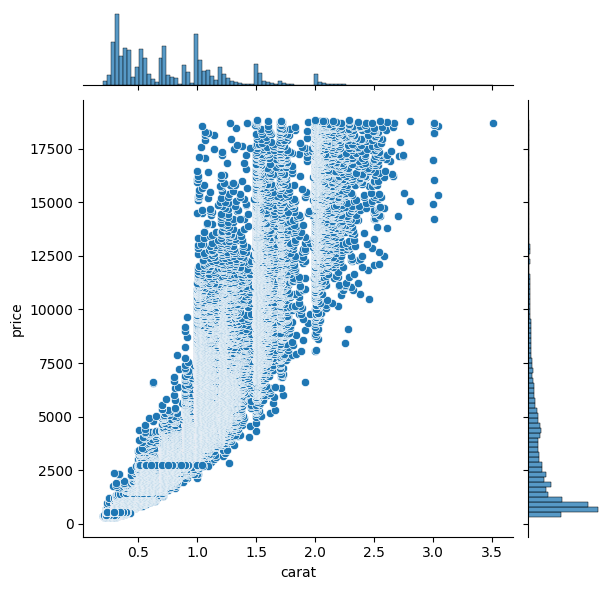

In [139]:
# 이상치 제거 : 데이터에 따라 이상치를 제거하지 말아야 하는 데이터도 있음 -> 이상치가 분석에 유의미한 영향을 미치는 경우
sns.jointplot(data=df, x='carat', y='price') # 그래프 분석 시 carat 3.5에 이상치 1개 가정(price 17500)

In [140]:
df = df[df['carat'] < 3.2] # 이상치 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x26387ec0410>,
 'caps': [<matplotlib.lines.Line2D at 0x26387ec1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x26380d6bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x26387ec2610>],
 'fliers': [<matplotlib.lines.Line2D at 0x26387ec2ed0>],
 'means': []}

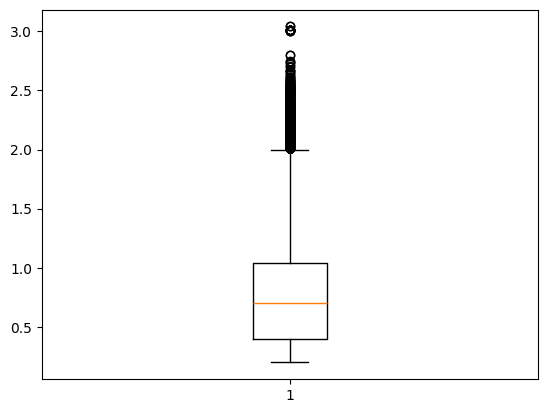

In [141]:
plt.boxplot(data=df, x='carat') # boxplot으로 이상치 제거 확인

In [142]:
corr = df.corr(numeric_only=True)
print(corr)
cols = df.select_dtypes(include='number').columns
print(cols)

          carat     depth     table     price         x         y         z
carat  1.000000  0.015946  0.182397  0.930882  0.976342  0.952544  0.954624
depth  0.015946  1.000000 -0.301491 -0.010956 -0.034331 -0.037495  0.083147
table  0.182397 -0.301491  1.000000  0.129423  0.194855  0.183260  0.151226
price  0.930882 -0.010956  0.129423  1.000000  0.889676  0.869594  0.867583
x      0.976342 -0.034331  0.194855  0.889676  1.000000  0.974175  0.971571
y      0.952544 -0.037495  0.183260  0.869594  0.974175  1.000000  0.952472
z      0.954624  0.083147  0.151226  0.867583  0.971571  0.952472  1.000000
Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


<Axes: >

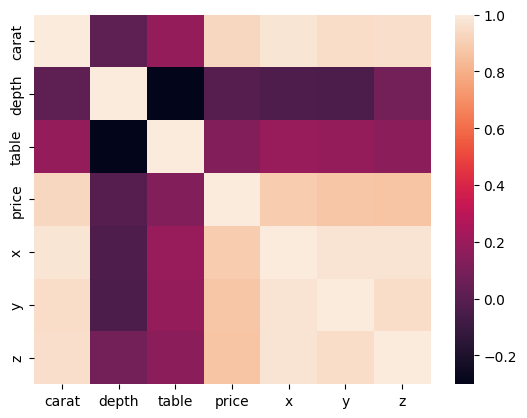

In [143]:
sns.heatmap(data=corr)

In [144]:
# print(help(plt.hist))

(array([34168., 11086.,  4065.,  2300.,  1579.]),
 array([  326. ,  4025.4,  7724.8, 11424.2, 15123.6, 18823. ]),
 <BarContainer object of 5 artists>)

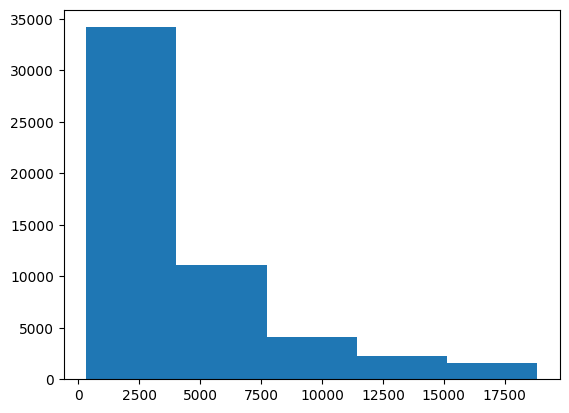

In [145]:
plt.hist(df['price'], bins=5)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53198 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53198 non-null  float64 
 1   cut      53198 non-null  category
 2   color    53198 non-null  category
 3   clarity  53198 non-null  category
 4   depth    53198 non-null  float64 
 5   table    53198 non-null  float64 
 6   price    53198 non-null  int64   
 7   x        53198 non-null  float64 
 8   y        53198 non-null  float64 
 9   z        53198 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [147]:
ccols_p = df.select_dtypes(exclude='number').columns
print(ccols_p)

Index(['cut', 'color', 'clarity'], dtype='object')


In [148]:
df_c = df.copy()
df_p = pd.get_dummies(data=df, columns=ccols_p)
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53198 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53198 non-null  float64
 1   depth          53198 non-null  float64
 2   table          53198 non-null  float64
 3   price          53198 non-null  int64  
 4   x              53198 non-null  float64
 5   y              53198 non-null  float64
 6   z              53198 non-null  float64
 7   cut_Ideal      53198 non-null  bool   
 8   cut_Premium    53198 non-null  bool   
 9   cut_Very Good  53198 non-null  bool   
 10  cut_Good       53198 non-null  bool   
 11  cut_Fair       53198 non-null  bool   
 12  color_D        53198 non-null  bool   
 13  color_E        53198 non-null  bool   
 14  color_F        53198 non-null  bool   
 15  color_G        53198 non-null  bool   
 16  color_H        53198 non-null  bool   
 17  color_I        53198 non-null  bool   
 18  color_J    

# 데이터 분리 후 진행

In [149]:
y = df['price']
X = df.drop('price', axis=1)
y.shape, X.shape

((53198,), (53198, 9))

In [150]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
ccols = X.select_dtypes(exclude='number').columns
print(ccols)

Index(['cut', 'color', 'clarity'], dtype='object')


In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ccols:
    X_train[col] = le.fit_transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])
X_train.info()
X_valid.info()
print(X_train.head(1))
print(X_valid.head(1))

<class 'pandas.core.frame.DataFrame'>
Index: 42558 entries, 39599 to 16154
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    42558 non-null  float64
 1   cut      42558 non-null  int32  
 2   color    42558 non-null  int32  
 3   clarity  42558 non-null  int32  
 4   depth    42558 non-null  float64
 5   table    42558 non-null  float64
 6   x        42558 non-null  float64
 7   y        42558 non-null  float64
 8   z        42558 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 2.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 10640 entries, 16686 to 15221
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10640 non-null  float64
 1   cut      10640 non-null  int32  
 2   color    10640 non-null  int32  
 3   clarity  10640 non-null  int32  
 4   depth    10640 non-null  float64
 5   table    10640 non-null  float64
 6   x        

In [153]:
print(set(X_train.columns) - set(X_valid.columns)) 
# 아무 것도 안나옴 -> 정상, 만약 나온다면 train 에만 존재한다는 것, test에만 존재하는 것은 상관 x

set()


In [154]:
ncols = X.select_dtypes(include='number').columns
print(ncols)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [155]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train[ncols] = mms.fit_transform(X_train[ncols])
X_valid[ncols] = mms.transform(X_valid[ncols])
X_train.head(1)
X_valid.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
16686,0.038732,2,4,2,0.5,0.25,0.458465,0.13805,0.083962


In [156]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [157]:
pred_xgbr = xgbr.predict(X_valid)
print(pred_xgbr.shape)

(10640,)


In [158]:
mse_xgbr = mean_squared_error(y_valid, pred_xgbr)
print(mse_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)
print(np.round(rmse_xgbr, 3)) # 540.917

292590.81710529025
540.917


In [159]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 42558, number of used features: 9
[LightGBM] [Info] Start training from score 3937.542295


LGBMRegressor()

In [160]:
pred_lgbmr = lgbmr.predict(X_valid)
print(pred_lgbmr)

[  478.87706409  7420.01577425 16720.3113945  ...   745.50267348
  3799.83118713  5977.46104487]


In [161]:
mse_lgbmr = mean_squared_error(y_valid, pred_lgbmr)
rmse_lgbmr = np.sqrt(mse_lgbmr)
print(np.round(rmse_lgbmr, 3)) # 537.228

537.228


In [162]:
diff_rmse = abs(abs(rmse_xgbr) - abs(rmse_lgbmr))
print(diff_rmse) # 3.688 

3.6888675770242116


- rmse 는 예측 오차들의 표준편차와 비슷한 개념이므로 작을 수록 좋음 
- LGBM(537.228) 이 이 데이터 예측 모델에 더 적합, but 이 데이터에서는 큰 차이는 없다

# DL 모델링

In [163]:
X_train.shape[1]

9

In [165]:
# print(help(model.compile))
print(help(Dense))

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

In [176]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))
# Epoch 10/10 5s 3ms/step - loss: 1342423.1250 - mse: 1342423.1250 - val_loss: 1211725.8750 - val_mse: 1211725.8750
# loss 가 너무 크다. 타겟인 y도 스케일링 해준 뒤 다시 테스트
# 타겟인 가격을 스케일링 할 경우 predict 후에는 스케일링 된 예측 가격을 inverse_transform 으로 다시 원래 가격으로 변환시킨다

Epoch 1/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 23906762.0000 - mse: 23906762.0000 - val_loss: 13818980.0000 - val_mse: 13818980.0000
Epoch 2/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12748677.0000 - mse: 12748677.0000 - val_loss: 9627136.0000 - val_mse: 9627136.0000
Epoch 3/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8331912.5000 - mse: 8331912.5000 - val_loss: 3839315.2500 - val_mse: 3839315.2500
Epoch 4/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3331494.0000 - mse: 3331494.0000 - val_loss: 1714879.1250 - val_mse: 1714879.1250
Epoch 5/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1725527.6250 - mse: 1725527.6250 - val_loss: 1337245.6250 - val_mse: 1337245.6250
Epoch 6/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1439056.3750 - mse: 1439056.3750 - val_loss: 1263822.1250 - val_mse: 1263822.1250
Epoch 7/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1349217.2500 - mse: 1349217.2500 - val_loss: 1233501.1250 - val_mse:

In [174]:
print(y_train)
print(y_valid)

39599    1084
33110     816
18289    7430
9885     4682
49946    2188
         ... 
11558    5034
45330    1662
38688    1041
885      2873
16154    6458
Name: price, Length: 42558, dtype: int64
16686      421
15791     6319
27455    18112
14897     5998
16144     6451
         ...  
51739     2403
745        557
29507      702
3980      3511
15221     6111
Name: price, Length: 10640, dtype: int64


In [177]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [178]:
print(history.history)
print(history.history['loss'])
print(history.history['val_loss'])

{'loss': [18448542.0, 12063400.0, 6806469.0, 2753331.25, 1636317.625, 1418104.625, 1333107.0, 1303004.5, 1270782.875, 1258537.0], 'mse': [18448542.0, 12063400.0, 6806469.0, 2753331.25, 1636317.625, 1418104.625, 1333107.0, 1303004.5, 1270782.875, 1258537.0], 'val_loss': [13818980.0, 9627136.0, 3839315.25, 1714879.125, 1337245.625, 1263822.125, 1233501.125, 1195856.25, 1173091.375, 1155891.625], 'val_mse': [13818980.0, 9627136.0, 3839315.25, 1714879.125, 1337245.625, 1263822.125, 1233501.125, 1195856.25, 1173091.375, 1155891.625]}
[18448542.0, 12063400.0, 6806469.0, 2753331.25, 1636317.625, 1418104.625, 1333107.0, 1303004.5, 1270782.875, 1258537.0]
[13818980.0, 9627136.0, 3839315.25, 1714879.125, 1337245.625, 1263822.125, 1233501.125, 1195856.25, 1173091.375, 1155891.625]


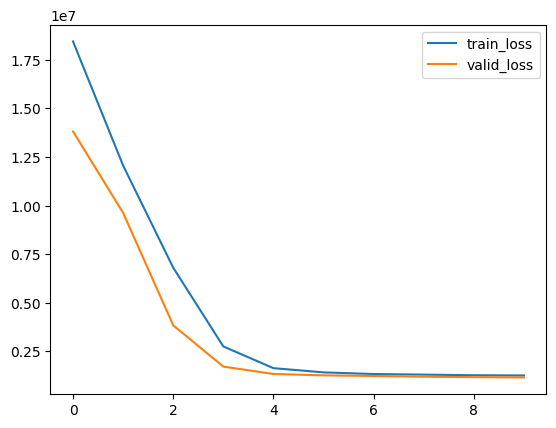

In [182]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='valid_loss')
plt.legend()

# 타겟 값 스케일링 후 다시 테스트

In [185]:
# y_train_c = y_train.copy()
# y_train = y_train_c.copy()
# y_valid_c = y_valid.copy()
# y_valid = y_valid_c.copy()

In [186]:
mms_y = MinMaxScaler()

In [194]:
# print(y_train)
# print(y_valid)
# print(y_train.values)
# print(y_valid.values)
# print(y_train.values.reshape(-1,1))
# print(y_valid.values.reshape(-1,1))

In [197]:
y_train = mms.fit_transform(y_train.values.reshape(-1,1))
y_valid = mms.fit_transform(y_valid.values.reshape(-1,1))

In [198]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))
# 0.0020 - mse: 0.0020 - val_loss: 0.0028 - val_mse: 0.0028
# 타겟 스케일링 후 loss 수치 감소

Epoch 1/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 8/10
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 9/10
1330/1330 ━━━━━━━━━━━━━━━━━━━

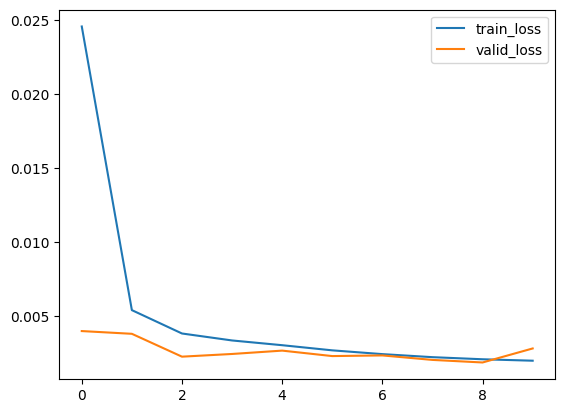

In [202]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='valid_loss')
plt.legend()

# 스케일링 된 예측 가격을 원래 스케일의 가격으로 복구

### DL 모델에 valid 데이터로 predict 진행시 주의 점
- X_valid는 모델이 학습할 때 직접 사용한 데이터는 아님
- (학습은 X_train, y_train에서만 함)

- X_valid는 모델 훈련 도중 성능을 측정하기 위해 사용된 검증(validation)용 데이터
- 따라서, 오버피팅은 아니고, predict() 해서 실제 예측값과 비교하는 건 전혀 문제 없음

- 그러나 X_valid는 하이퍼파라미터 튜닝이나 조기 종료(early stopping)에 사용된다면, 모델이 간접적으로 영향을 받았을 수 있음
- 따라서 완전히 새로운 데이터(test set 또는 실사용 데이터)보다는 조금 더 낙관적인 결과가 나올 수 있으니 주의 필요

- 필요 시 원본 데이터인 df 를 X, y 로 분리한 후 train_test_split을 2번 중첩사용해서 train, valid, test 용으로 나눌 필요

In [218]:
pred_dl = model.predict(X_valid)
print(pred_dl) # 스케일링 된 예측 가격 0.03996596

333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
[[0.03996596]
 [0.37459594]
 [0.8755967 ]
 ...
 [0.06500401]
 [0.18886533]
 [0.2928489 ]]


In [215]:
origin_p = mms.inverse_transform(pred_dl)
print(origin_p) # 원래 스케일대로 복원된 X_valid의 예측 가격 값 1073.8907

[[ 1073.8907]
 [ 7260.53  ]
 [16523.031 ]
 ...
 [ 1536.7941]
 [ 3826.7422]
 [ 5749.191 ]]


In [223]:
mse_dl = mean_squared_error(y_valid, pred_dl)
print(np.round(mse_dl, 5)) # 0.00279

0.00279


In [225]:
X_valid.iloc[0]

carat      0.038732
cut        2.000000
color      4.000000
clarity    2.000000
depth      0.500000
table      0.250000
x          0.458465
y          0.138050
z          0.083962
Name: 16686, dtype: float64

In [242]:
# 단일 값 예측
pred_dl_0 = model.predict(X_valid.iloc[[0]]) # [[]] 데이터 프레임으로
print(pred_dl_0)
origin_p_0 = mms.inverse_transform(pred_dl_0)
print(f'예측가격 : {origin_p_0}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.03996596]]
예측가격 : [[1073.8907]]
